In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup

In [2]:

chrome_options = webdriver.ChromeOptions()
# chrome_options.add_argument('--headless') #내부 창을 띄우지 않고 실행가능
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument("lang=ko_KR")
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver.exe',options=chrome_options)
# driver = webdriver.Chrome('chromedriver')


In [3]:
search_key = '코로나 확진자'
url = 'https://www.google.com/search?q={}'.format(search_key)
driver.get(url)


In [13]:

html = driver.page_source
soup = BeautifulSoup(html,'html.parser')
soup = soup.findAll("ol")
# print(soup)
html = driver.page_source

#BeautifulSoup을 이용해서 html형식으로 파싱한다.
#아래의 soup을 출력하면 페이지의 모든 소스를 출력하게 된다.
soup = BeautifulSoup(html,'html.parser')

# 페이지의 소스중 ol 태그를 가진 모든 소스만 soup에 저장한다.
soup = soup.findAll("ol")
# ol태그만 파싱한 소스는 10개의 리스트로 이루어저 있다.
#print(len(soup)) 를 통해 알 수 있다.
# 그중 우리가 필요한 정보는 코로나 확진자 수와 날짜에 대한 정보이기 때문에 
# 그에 해당하는 2번째 리스트 soup[1] 을 선택하고 
# 이 정보는 <li></li>태그로 감싸저 있기 때문에 .text를 이용해서 텍스트 정보만 파싱한다.
all_count = soup[1].text

# 위의  all_count를 출력하면 일열로 쭉 ~~~ 늘어진 확진자 수와 날짜를 볼 수 있다.
# 조금더 깔끔하게 출력하고자 replace 함수를 사용하여 줄을 띄었다.
all_count = all_count.replace("일","일,").replace('1,0','10').replace('1,1','11').replace('1,2','12').replace('1,3','13').replace('1,4','14').replace('회','').replace('월 ','-').replace('일','') 
all_count = all_count.strip()
all_count = all_count.split(",")


In [20]:

## 데이터 변환 저장 
import pandas as pd

count_list = []
small_list = []
for i , data in enumerate(all_count) :
    data = data.strip()
    # print(data)
    if i%2 == 1 and i !=0 :
        month,day = data.split('-')
        print(month, day)
        if i < 632 : 
            data = pd.Timestamp(2020,int(month),int(day))
        else : 
            data = pd.Timestamp(2021,int(month),int(day))

    small_list.append(data)
    if i%2 == 1 and i !=0 :
        count_list.append(small_list)
        small_list = []

pdata = pd.DataFrame(count_list)
pdata.columns = ['count','date']




2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
4 23
4 24
4 25
4 26
4 27
4 28
4 29
4 30
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
5 20
5 21
5 22
5 23
5 24
5 25
5 26
5 27
5 28
5 29
5 30
5 31
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
6 20
6 21
6 22
6 23
6 24
6 25
6 26
6 27
6 28
6 29
6 30
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
7 19
7 20
7 21
7 22
7 23
7 24
7 25
7 26
7 27
7 28
7 29
7 30
7 31
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
8 20
8 21
8 22
8 23
8 24
8 25
8 26
8 27
8 28
8 29
8 30
8 31
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
9 15
9 16
9 17
9 18
9 1

2021년도 적용은 수동으로 함.. 개발자 답지 않네..

In [21]:

###### 데이터 저장
pdata.to_csv("daily_corona_conut.csv")


년도가 섞여 있어서 아래 그래프가 요상하게 나온거쥬, 하지만 보고서 쓰는게 급하다 passpass 

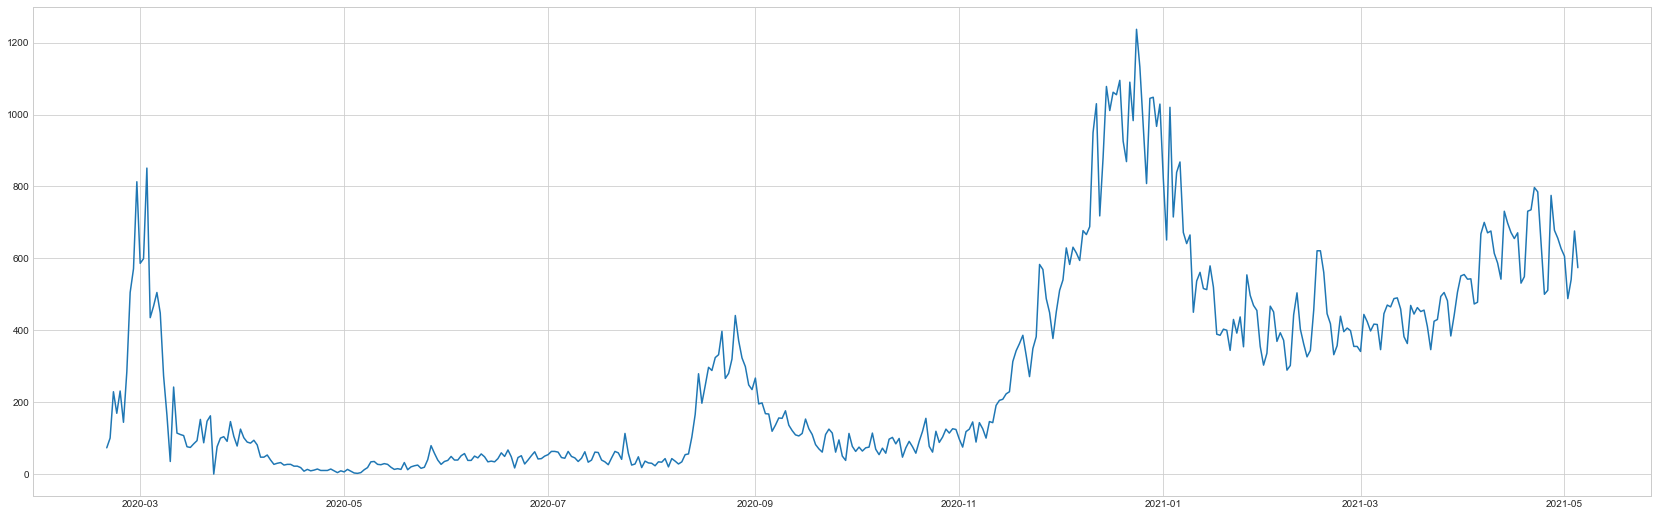

In [22]:
###### 데이터 시각화
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(29,9))

pdata['count'] = pd.to_numeric(pdata['count'])

# pdata['date'] = pd.Timestamp(2020,pdata['date'].split('-'))
plt.plot(pdata['date'],pdata['count'])

# plt.show()
